# Electric Cars Forecasting

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['RIVN', 'LCID', 'GM', 'F', 'HMC', 'TSLA']
start = '2021-12-01'
end = '2022-09-02'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  6 of 6 completed


,F,GM,HMC,LCID,RIVN,TSLA
Date,,,,,,
2021-12-01 00:00:00-05:00,17.837305,57.664856,26.965633,51.139999,115.690002,365.000000
2021-12-02 00:00:00-05:00,18.101494,60.604710,27.626888,48.410000,110.769997,361.533325
2021-12-03 00:00:00-05:00,17.436466,59.303623,27.442125,47.270000,104.669998,338.323334
2021-12-06 00:00:00-05:00,17.509346,59.432743,27.549095,44.860001,116.779999,336.336670
2021-12-07 00:00:00-05:00,18.183483,61.111237,28.093658,43.880001,116.180000,350.583344


In [3]:
df.tail()

,F,GM,HMC,LCID,RIVN,TSLA
Date,,,,,,
2022-08-26 00:00:00-04:00,14.346178,38.963005,25.982496,16.24,32.110001,288.089996
2022-08-29 00:00:00-04:00,14.495132,39.241104,26.436251,16.17,32.310001,284.820007
2022-08-30 00:00:00-04:00,14.383417,38.952423,26.288288,15.15,31.889999,277.700012
2022-08-31 00:00:00-04:00,14.187914,38.036594,26.160053,15.34,32.709999,275.609985
2022-09-01 00:00:00-04:00,14.141365,38.385006,25.765482,15.38,31.950001,277.160004


In [4]:
def make_forecast(symbol, periods, start, end):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    df = yf.download(symbol, start, end)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df.index = pd.Index(df.index.date, name="Date")
    df = df.reset_index()
    df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
    df = df[['ds', 'y']]

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=True)
    m.fit(df)

    future = m.make_future_dataframe(periods=365)

    forecast = m.predict(future)

    m.plot(forecast)
    
    m.plot_components(forecast)
    
    return forecast

[*********************100%***********************]  1 of 1 completed


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-01,115.976991,112.927444,125.981775,115.976991,115.976991,3.099476,3.099476,3.099476,2.697596,2.697596,2.697596,0.401880,0.401880,0.401880,0.0,0.0,0.0,119.076467
1,2021-12-02,115.110531,110.903832,124.316877,115.110531,115.110531,2.672751,2.672751,2.672751,2.697596,2.697596,2.697596,-0.024845,-0.024845,-0.024845,0.0,0.0,0.0,117.783283
2,2021-12-03,114.244072,109.444127,123.327889,114.244072,114.244072,2.023782,2.023782,2.023782,2.697596,2.697596,2.697596,-0.673814,-0.673814,-0.673814,0.0,0.0,0.0,116.267853
3,2021-12-06,111.644692,107.610214,121.017924,111.644692,111.644692,2.994617,2.994617,2.994617,2.697596,2.697596,2.697596,0.297022,0.297022,0.297022,0.0,0.0,0.0,114.639309
4,2021-12-07,110.778232,107.841633,120.755300,110.778232,110.778232,3.371751,3.371751,3.371751,2.697596,2.697596,2.697596,0.674156,0.674156,0.674156,0.0,0.0,0.0,114.149983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2023-08-28,57.578356,-17.593409,137.046807,-21.037074,134.127539,2.994617,2.994617,2.994617,2.697596,2.697596,2.697596,0.297022,0.297022,0.297022,0.0,0.0,0.0,60.572974
551,2023-08-29,57.649056,-18.066977,137.069430,-21.310194,134.546372,3.371751,3.371751,3.371751,2.697596,2.697596,2.697596,0.674156,0.674156,0.674156,0.0,0.0,0.0,61.020807
552,2023-08-30,57.719756,-21.256590,139.702482,-21.545848,134.965206,3.099476,3.099476,3.099476,2.697596,2.697596,2.697596,0.401880,0.401880,0.401880,0.0,0.0,0.0,60.819232
553,2023-08-31,57.790456,-19.508897,138.799735,-21.689375,135.350343,2.672751,2.672751,2.672751,2.697596,2.697596,2.697596,-0.024845,-0.024845,-0.024845,0.0,0.0,0.0,60.463207


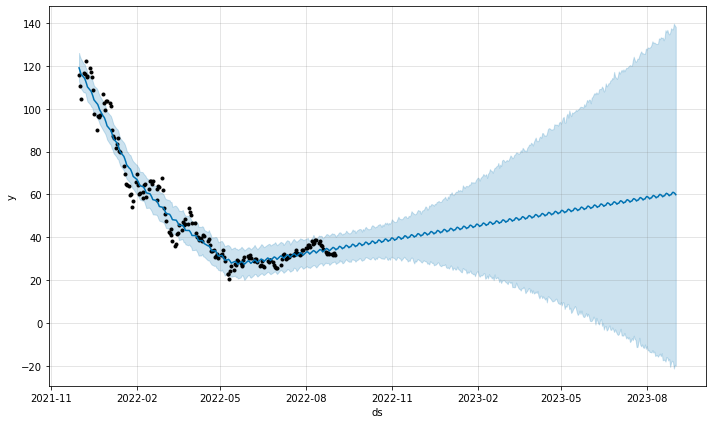

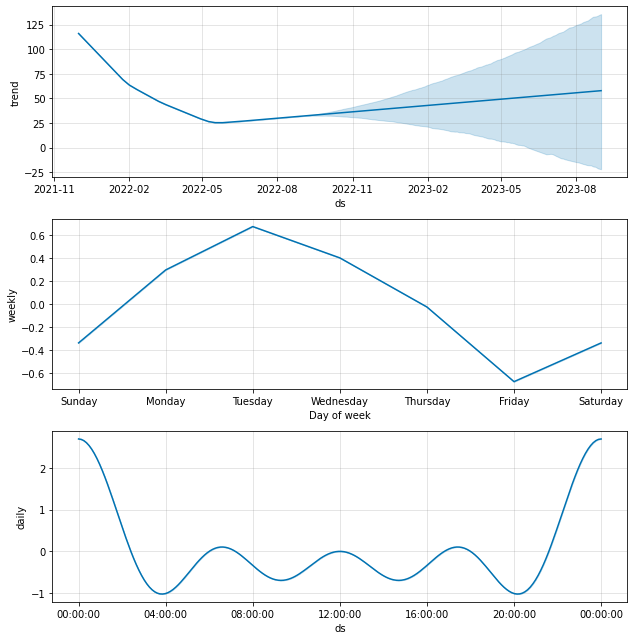

In [5]:
make_forecast('RIVN', 20, '2021-12-01', '2022-09-02')

[*********************100%***********************]  1 of 1 completed


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-01,49.863656,41.924376,48.149353,49.863656,49.863656,-4.756555,-4.756555,-4.756555,-4.816299,-4.816299,-4.816299,0.059745,0.059745,0.059745,0.0,0.0,0.0,45.107101
1,2021-12-02,49.654954,40.995151,47.623822,49.654954,49.654954,-5.220913,-5.220913,-5.220913,-4.816299,-4.816299,-4.816299,-0.404614,-0.404614,-0.404614,0.0,0.0,0.0,44.434041
2,2021-12-03,49.446252,40.755429,47.555746,49.446252,49.446252,-5.233863,-5.233863,-5.233863,-4.816299,-4.816299,-4.816299,-0.417564,-0.417564,-0.417564,0.0,0.0,0.0,44.212388
3,2021-12-06,48.820146,40.652247,47.077678,48.820146,48.820146,-5.098276,-5.098276,-5.098276,-4.816299,-4.816299,-4.816299,-0.281977,-0.281977,-0.281977,0.0,0.0,0.0,43.721870
4,2021-12-07,48.611444,40.581228,46.994868,48.611444,48.611444,-4.975963,-4.975963,-4.975963,-4.816299,-4.816299,-4.816299,-0.159664,-0.159664,-0.159664,0.0,0.0,0.0,43.635481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2023-08-28,18.772884,-3.186583,31.190370,2.031227,36.380337,-5.098276,-5.098276,-5.098276,-4.816299,-4.816299,-4.816299,-0.281977,-0.281977,-0.281977,0.0,0.0,0.0,13.674608
551,2023-08-29,18.762294,-3.459630,31.062770,1.940186,36.404700,-4.975963,-4.975963,-4.975963,-4.816299,-4.816299,-4.816299,-0.159664,-0.159664,-0.159664,0.0,0.0,0.0,13.786331
552,2023-08-30,18.751704,-2.585600,31.778495,1.849145,36.429063,-4.756555,-4.756555,-4.756555,-4.816299,-4.816299,-4.816299,0.059745,0.059745,0.059745,0.0,0.0,0.0,13.995149
553,2023-08-31,18.741114,-3.428558,31.957432,1.758104,36.455107,-5.220913,-5.220913,-5.220913,-4.816299,-4.816299,-4.816299,-0.404614,-0.404614,-0.404614,0.0,0.0,0.0,13.520201


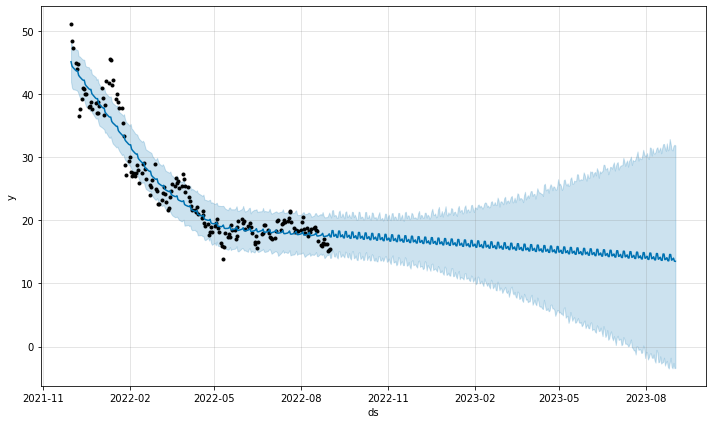

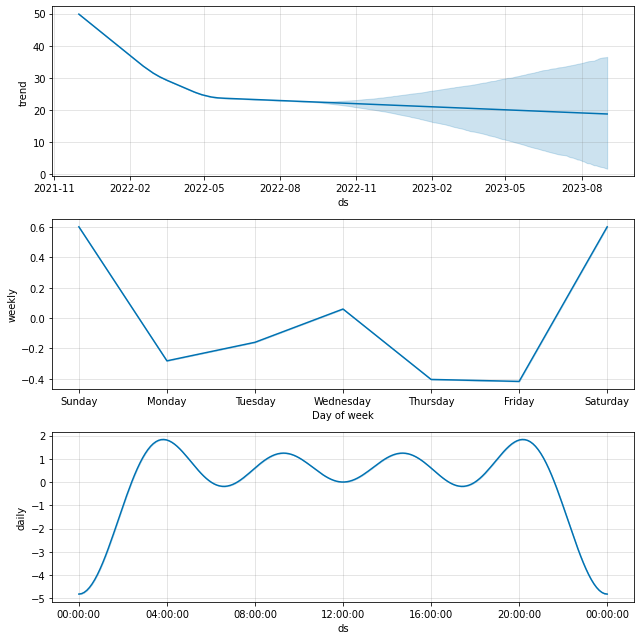

In [6]:
make_forecast('LCID', 20, '2021-12-01', '2022-09-02')

[*********************100%***********************]  1 of 1 completed


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-01,58.246302,57.603542,62.509283,58.246302,58.246302,1.818553,1.818553,1.818553,1.617684,1.617684,1.617684,0.200869,0.200869,0.200869,0.0,0.0,0.0,60.064855
1,2021-12-02,58.204794,57.360527,62.162950,58.204794,58.204794,1.703656,1.703656,1.703656,1.617684,1.617684,1.617684,0.085973,0.085973,0.085973,0.0,0.0,0.0,59.908450
2,2021-12-03,58.163285,57.486320,62.117781,58.163285,58.163285,1.696470,1.696470,1.696470,1.617684,1.617684,1.617684,0.078786,0.078786,0.078786,0.0,0.0,0.0,59.859755
3,2021-12-06,58.038760,57.068406,61.848930,58.038760,58.038760,1.448521,1.448521,1.448521,1.617684,1.617684,1.617684,-0.169163,-0.169163,-0.169163,0.0,0.0,0.0,59.487281
4,2021-12-07,57.997252,57.383680,62.224208,57.997252,57.997252,1.825640,1.825640,1.825640,1.617684,1.617684,1.617684,0.207956,0.207956,0.207956,0.0,0.0,0.0,59.822891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2023-08-28,83.385191,39.219578,133.957084,37.318273,131.655132,1.448521,1.448521,1.448521,1.617684,1.617684,1.617684,-0.169163,-0.169163,-0.169163,0.0,0.0,0.0,84.833712
551,2023-08-29,83.510624,39.175610,134.597593,37.348156,131.930970,1.825640,1.825640,1.825640,1.617684,1.617684,1.617684,0.207956,0.207956,0.207956,0.0,0.0,0.0,85.336264
552,2023-08-30,83.636057,38.710245,135.056558,37.156302,132.196107,1.818553,1.818553,1.818553,1.617684,1.617684,1.617684,0.200869,0.200869,0.200869,0.0,0.0,0.0,85.454610
553,2023-08-31,83.761490,39.674724,134.989338,37.054926,132.529063,1.703656,1.703656,1.703656,1.617684,1.617684,1.617684,0.085973,0.085973,0.085973,0.0,0.0,0.0,85.465147


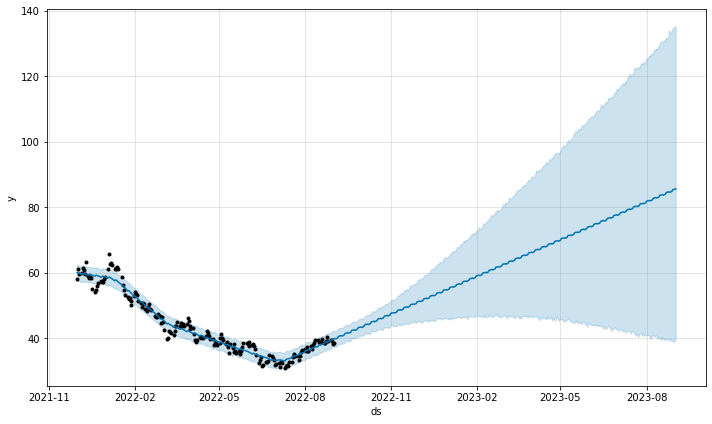

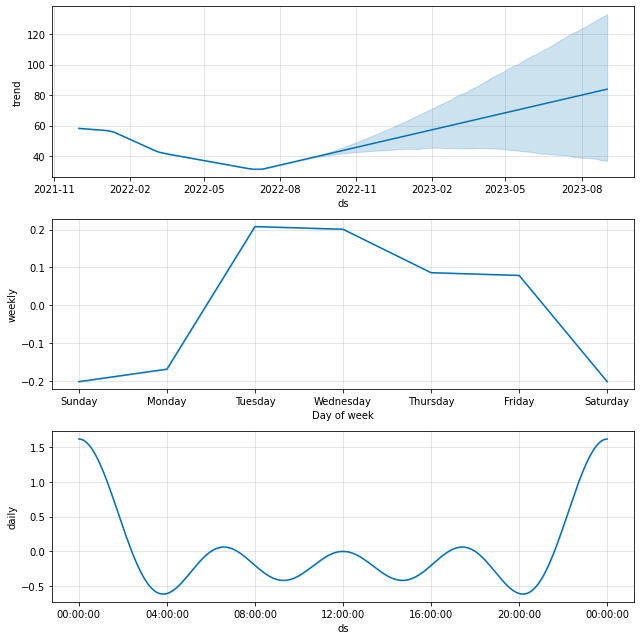

In [7]:
make_forecast('GM', 20, '2021-12-01', '2022-09-02')

[*********************100%***********************]  1 of 1 completed


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-01,19.600284,18.969877,21.496794,19.600284,19.600284,0.565597,0.565597,0.565597,0.493287,0.493287,0.493287,0.072309,0.072309,0.072309,0.0,0.0,0.0,20.165881
1,2021-12-02,19.640926,18.776224,21.419078,19.640926,19.640926,0.522699,0.522699,0.522699,0.493287,0.493287,0.493287,0.029411,0.029411,0.029411,0.0,0.0,0.0,20.163625
2,2021-12-03,19.681568,18.903043,21.497521,19.681568,19.681568,0.516352,0.516352,0.516352,0.493287,0.493287,0.493287,0.023065,0.023065,0.023065,0.0,0.0,0.0,20.197920
3,2021-12-06,19.803495,18.785476,21.485590,19.803495,19.803495,0.391049,0.391049,0.391049,0.493287,0.493287,0.493287,-0.102238,-0.102238,-0.102238,0.0,0.0,0.0,20.194544
4,2021-12-07,19.844137,19.217398,21.824596,19.844137,19.844137,0.594062,0.594062,0.594062,0.493287,0.493287,0.493287,0.100774,0.100774,0.100774,0.0,0.0,0.0,20.438198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2023-08-28,43.124121,18.002345,65.433756,17.484031,64.805122,0.391049,0.391049,0.391049,0.493287,0.493287,0.493287,-0.102238,-0.102238,-0.102238,0.0,0.0,0.0,43.515170
551,2023-08-29,43.199796,17.867729,65.790815,17.445021,64.947958,0.594062,0.594062,0.594062,0.493287,0.493287,0.493287,0.100774,0.100774,0.100774,0.0,0.0,0.0,43.793858
552,2023-08-30,43.275472,17.993511,66.106516,17.396706,65.090793,0.565597,0.565597,0.565597,0.493287,0.493287,0.493287,0.072309,0.072309,0.072309,0.0,0.0,0.0,43.841069
553,2023-08-31,43.351147,17.942260,65.916863,17.342802,65.276471,0.522699,0.522699,0.522699,0.493287,0.493287,0.493287,0.029411,0.029411,0.029411,0.0,0.0,0.0,43.873846


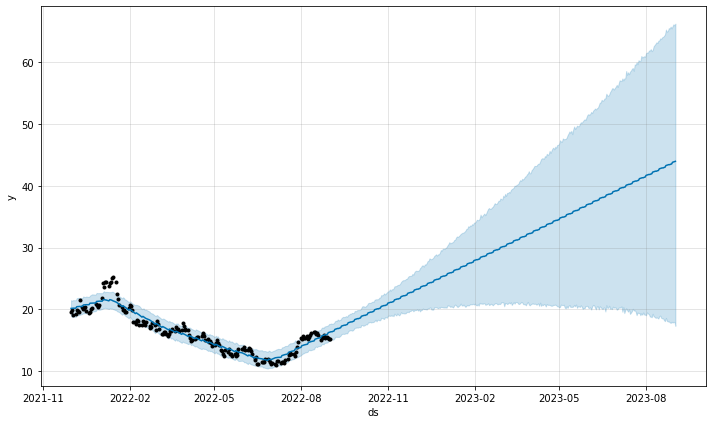

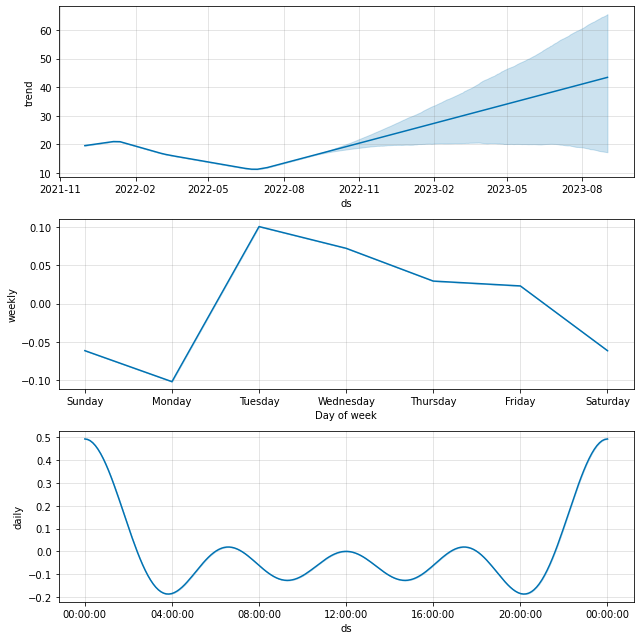

In [8]:
make_forecast('F', 20, '2021-12-01', '2022-09-02')

[*********************100%***********************]  1 of 1 completed


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-01,360.863755,306.982581,385.317182,360.863755,360.863755,-13.207852,-13.207852,-13.207852,-14.310187,-14.310187,-14.310187,1.102335,1.102335,1.102335,0.0,0.0,0.0,347.655903
1,2021-12-02,360.467651,305.693652,382.822663,360.467651,360.467651,-15.763821,-15.763821,-15.763821,-14.310187,-14.310187,-14.310187,-1.453634,-1.453634,-1.453634,0.0,0.0,0.0,344.703830
2,2021-12-03,360.071546,306.773685,381.849471,360.071546,360.071546,-18.614761,-18.614761,-18.614761,-14.310187,-14.310187,-14.310187,-4.304574,-4.304574,-4.304574,0.0,0.0,0.0,341.456786
3,2021-12-06,358.883233,311.728796,383.008688,358.883233,358.883233,-12.877498,-12.877498,-12.877498,-14.310187,-14.310187,-14.310187,1.432689,1.432689,1.432689,0.0,0.0,0.0,346.005735
4,2021-12-07,358.487129,308.179438,385.235786,358.487129,358.487129,-14.664550,-14.664550,-14.664550,-14.310187,-14.310187,-14.310187,-0.354363,-0.354363,-0.354363,0.0,0.0,0.0,343.822579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2023-08-28,497.382231,355.365163,625.356253,377.480067,631.007734,-12.877498,-12.877498,-12.877498,-14.310187,-14.310187,-14.310187,1.432689,1.432689,1.432689,0.0,0.0,0.0,484.504733
551,2023-08-29,497.923342,355.271726,624.804427,377.738321,631.864116,-14.664550,-14.664550,-14.664550,-14.310187,-14.310187,-14.310187,-0.354363,-0.354363,-0.354363,0.0,0.0,0.0,483.258792
552,2023-08-30,498.464452,361.679340,624.868013,377.996574,632.940560,-13.207852,-13.207852,-13.207852,-14.310187,-14.310187,-14.310187,1.102335,1.102335,1.102335,0.0,0.0,0.0,485.256600
553,2023-08-31,499.005562,357.255087,620.087933,378.254828,634.207604,-15.763821,-15.763821,-15.763821,-14.310187,-14.310187,-14.310187,-1.453634,-1.453634,-1.453634,0.0,0.0,0.0,483.241742


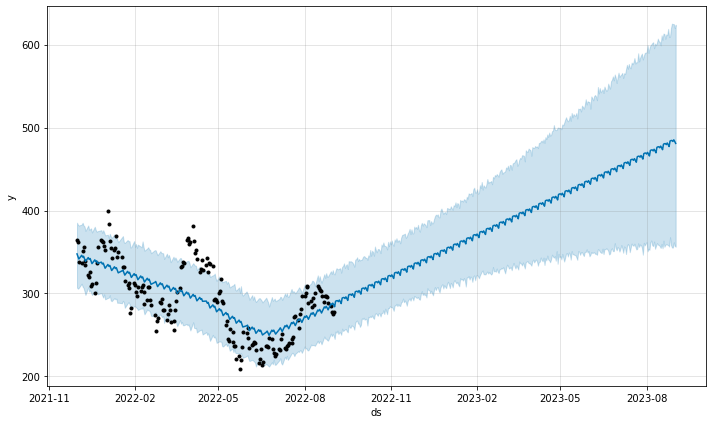

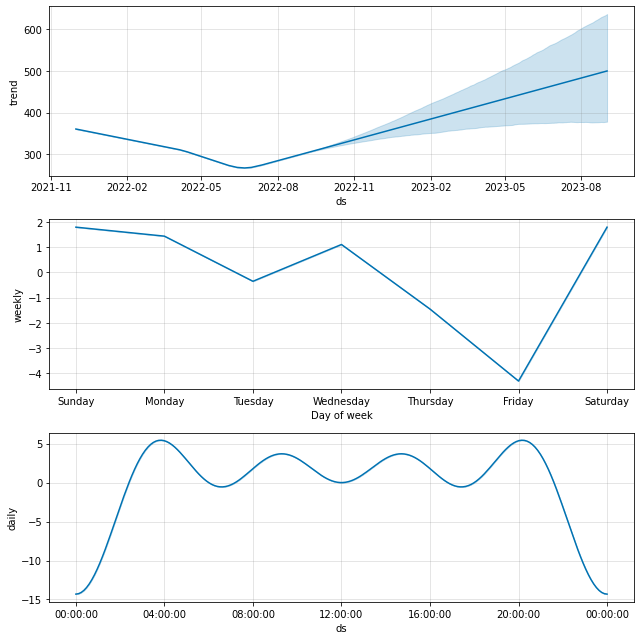

In [9]:
make_forecast('TSLA', 20, '2021-12-01', '2022-09-02')